# ANÁLISIS DE COVID-19 TWEETS

## Importación de las librerias

Importamos las librerias necesarias para la realización del ejercicio.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print('Setup complete.')

Setup complete.


## Visualización del dataset

Comenzamos con la lectura del csv ubicado en la carpeta data. Tras ello, mediante .head() se imprimirán las primeras filas del csv.

In [42]:
df_tweets = pd.read_csv('data/covid19_tweets.csv')

In [43]:
df_tweets.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [44]:
round(df_tweets.describe(), 0)

,user_followers,user_friends,user_favourites
count,179108.0,179108.0,179108.0
mean,109056.0,2122.0,14444.0
std,841467.0,9163.0,44523.0
min,0.0,0.0,0.0
25%,172.0,148.0,206.0
50%,992.0,542.0,1791.0
75%,5284.0,1725.0,9388.0
max,49442559.0,497363.0,2047197.0


A continuación, a través de esta función veremos el tipo de datos de cada columna. Es decir, si son: float, int64, object, etc.

In [45]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


Para poder hacerlo manipulable. Sería conveniente convertir la columna date en una datetime64, ya que haciendo esto se podrían hacer operaciones matemáticas y estadísticas en las fechas propuestas.

In [46]:
df_tweets['date'] = df_tweets['date'].astype('datetime64')

In [47]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_name         179108 non-null  object        
 1   user_location     142337 non-null  object        
 2   user_description  168822 non-null  object        
 3   user_created      179108 non-null  object        
 4   user_followers    179108 non-null  int64         
 5   user_friends      179108 non-null  int64         
 6   user_favourites   179108 non-null  int64         
 7   user_verified     179108 non-null  bool          
 8   date              179108 non-null  datetime64[ns]
 9   text              179108 non-null  object        
 10  hashtags          127774 non-null  object        
 11  source            179031 non-null  object        
 12  is_retweet        179108 non-null  bool          
dtypes: bool(2), datetime64[ns](1), int64(3), object(7)
memory u

## Limpieza del dataset

La limpieza del dataset es sumamanete importante a la hora de analizar los datos para que no haya errores.

### Datos vacios

Primero realizaremos la comprobación para ver si hay datos vacios, para que sean eliminados.

In [48]:
df_tweets.isnull().sum()

user_name               0
user_location       36771
user_description    10286
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            51334
source                 77
is_retweet              0
dtype: int64

In [49]:
df_tweets_f2 = df_tweets.dropna()

**COMPROBACIÓN**

In [50]:
df_tweets_f2.isnull().values.any()

False

### Datos duplicados

In [51]:
total_duplicates = df_tweets_f2.duplicated().sum()
if total_duplicates == 0:
    print('No hay datos duplicados.')
else:
    print('Total duplicados:', total_duplicates)

No hay datos duplicados.


**COMPROBACIÓN**

In [52]:
print('Total:', df_tweets_f2.shape[0]) # SOLO FILAS [0]
print('Antes de eliminar:', df_tweets.shape[0])

Total: 99138
Antes de eliminar: 179108


## Análisis mediante gráficas

In [53]:
df_tweets_f2.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",Twitter Web App,False
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,"['COVID19', 'Recruiting']",Buffer,False


### Tweets por día

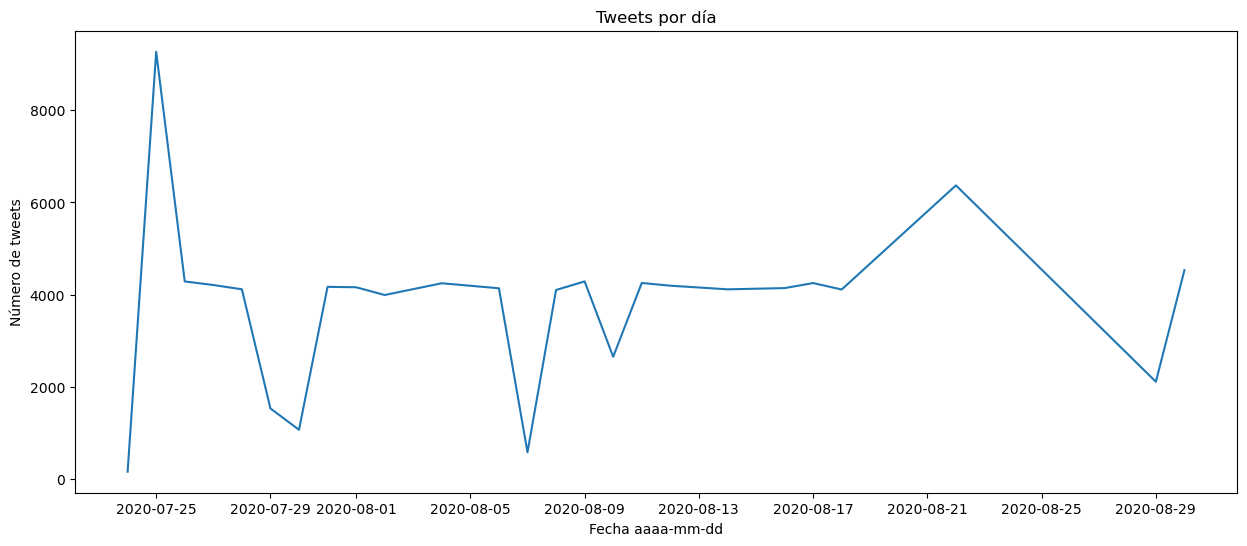

In [54]:
counts = df_tweets_f2.groupby(df_tweets_f2['date'].dt.date)['text'].count() #mediante groupby agrupamos por fecha y contamos el número de tweets

plt.figure(figsize=(15, 6))
plt.plot(counts.index, counts.values)
plt.xlabel('Fecha aaaa-mm-dd')
plt.ylabel('Número de tweets')
plt.title('Tweets por día')
plt.savefig('imagenes/recuentos_tweets.png')
plt.show()

### Hashtags más utilizados

In [55]:
hashtag_counts = df_tweets_f2['hashtags'].value_counts()
print(hashtag_counts)

['COVID19']                       30054
['Covid19']                        3838
['covid19']                        2368
['coronavirus']                     442
['COVID19', 'coronavirus']          407
                                  ...  
['golf', 'COVID19']                   1
['covid19', 'PedsICU', 'ecmo']        1
['COVID19', 'SODEIT']                 1
['Broadway']                          1
['covid19', 'world']                  1
Name: hashtags, Length: 41709, dtype: int64


A continuación de todos ellos, seleccionaremos los 10 más utilizados.

In [56]:
top_hashtags = hashtag_counts[:10]

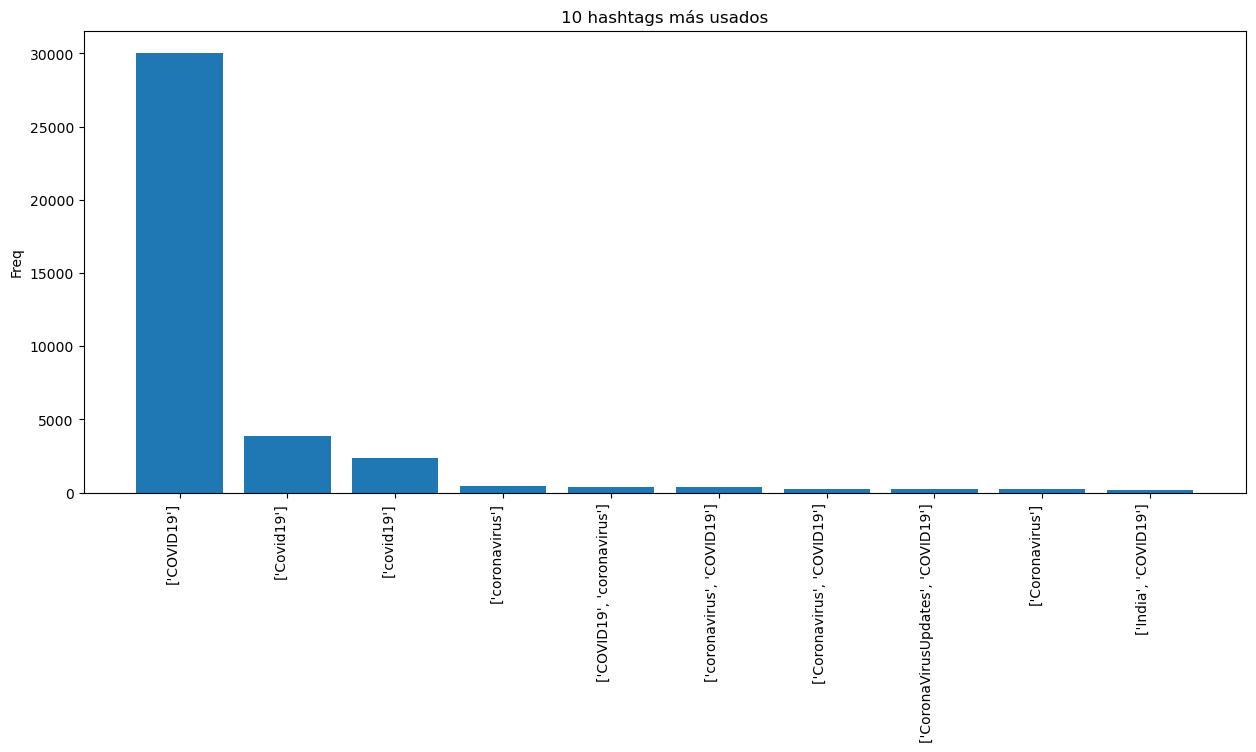

In [57]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(top_hashtags.index, top_hashtags.values)

ax.set_title('10 hashtags más usados')
ax.set_ylabel('Freq')
plt.xticks(rotation=90, ha="right")
plt.savefig('imagenes/hashtags_usados.png')

plt.show()

## Árbol de decisión

### Variables contínuas

In [58]:
v_continuas = []
v_categorica = []
for x in df_tweets_f2:
  if len(df_tweets_f2[x].unique())>25:
    v_continuas.append(x)
  else:
    v_categorica.append(x)
print('Variables continuas: {}'.format(v_continuas))
print('Variables categóricas: {}'.format(v_categorica))

Variables continuas: ['user_name', 'user_location', 'user_description', 'user_created', 'user_followers', 'user_friends', 'user_favourites', 'date', 'text', 'hashtags', 'source']
Variables categóricas: ['user_verified', 'is_retweet']


In [59]:
target = 'is_retweet' #variable objetivo, pongamos por ejemplo que queremos predecir si un tweet es un retweet o no
features = df_tweets_f2.select_dtypes(include=['float64', 'int64']) #seleccionamos las variables numéricas
features = features.columns.tolist()

print(f'Variable objetivo: {target} \nVariables predictoras: {features}')

Variable objetivo: is_retweet 
Variables predictoras: ['user_followers', 'user_friends', 'user_favourites']


In [60]:
from sklearn.tree import DecisionTreeRegressor

arbol_importancia = DecisionTreeRegressor(max_depth=len(features)+10, random_state=100)

arbol_importancia.fit(X=df_tweets_f2[features], y=df_tweets_f2[target])

DecisionTreeRegressor(max_depth=13, random_state=100)

In [61]:
# Comprobamos que se obtiene un R^2 muy alto. Lo desesable es que sea 1.
y_pred_arbol = arbol_importancia.predict(X=df_tweets_f2[features])

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(df_tweets_f2[target], y_pred_arbol))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_tweets_f2[target], y_pred_arbol)*100)
print('Mean Squared Error:', mean_squared_error(df_tweets_f2[target], y_pred_arbol))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(df_tweets_f2[target], y_pred_arbol)))
print('R^2 coefficient of determination:', r2_score(df_tweets_f2[target], y_pred_arbol))

Mean Absolute Error: 0.0
Mean Absolute Percentage Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R^2 coefficient of determination: 1.0


Dataset perfecto